In [13]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle


## Q-learning Update Rule

The Q-learning algorithm updates the Q-value for a given state-action pair \((s, a)\) using the following equation:

\[
Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right)
\]


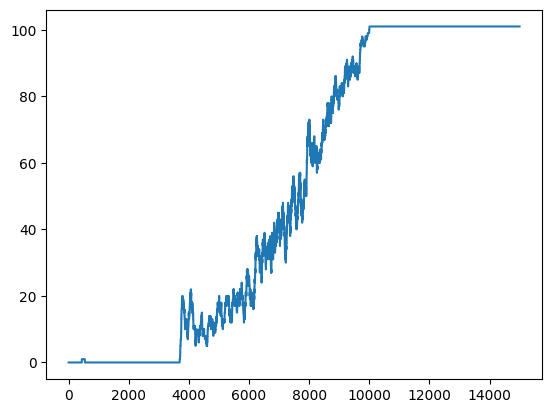

In [22]:
env = gym.make("FrozenLake-v1", map_name = "8x8", is_slippery = False, render_mode = None)
q = np.zeros((env.observation_space.n,env.action_space.n))

learning_rate_a = 0.9
discount_factor_g = 0.9

epsilon = 1  # 100% random action 
epsilon_decay_rate = 0.0001 # gamma 
rng = np.random.default_rng()
episdoes = 15000

rewards_per_episode = np.zeros(episdoes)
for i in range(episdoes):
    state = env.reset()[0] #state 0-63
    terminated = False
    truncated = False

    while (not terminated and not truncated):
        if rng.random() < epsilon:
            action = env.action_space.sample()# 0: LEFT 1: DOWN 2: RIGHT 3: UP 
        else:
            action = np.argmax(q[state,:])
      
        new_state, reward, terminated, truncated, _ = env.step(action)
        q[state, action] = q[state, action] + learning_rate_a * (
            reward + discount_factor_g * np.max(q[new_state, :]) - q[state, action]
        )
        state = new_state
    epsilon = max(epsilon - epsilon_decay_rate, 0)

    if (epsilon == 0):
        learning_rate_a = 0.0001
    if reward ==1:
        rewards_per_episode[i] = 1

    
sum_rewards = np.zeros(episdoes)
for t in range(episdoes):
    sum_rewards[t] = np.sum(rewards_per_episode[max(0,t-100):(t+1)])

plt.plot(sum_rewards)
plt.show()    

env.close()

In [14]:
def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('frozen_lake8x8.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.0001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake8x8.png')

    if is_training:
        f = open("frozen_lake8x8.pkl","wb")
        pickle.dump(q, f)
        f.close()

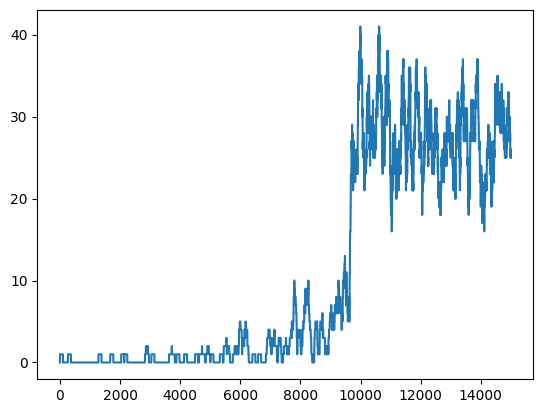

In [17]:
run(15000, is_training=True, render=None)